# Lecture 31: Linear Transformation and Their Matrices

Reference    
Lecture video: https://www.youtube.com/watch?v=Ts3o2I8_Mxc             
Chinese note: https://nbviewer.jupyter.org/github/zlotus/notes-linear-algebra/blob/master/chapter31.ipynb   
Official summary: https://ocw.mit.edu/courses/mathematics/18-06sc-linear-algebra-fall-2011/positive-definite-matrices-and-applications/linear-transformations-and-their-matrices/MIT18_06SCF11_Ses3.6sum.pdf

Linear transformation satisfies:
$$
\begin{array}{c}
T(v+w)=T(v)+T(w) \\
T(c v)=c T(v)
\end{array}
$$

We can combine them into one: $T(c v+d w)=c T(v)+d T(w)$

Example1: The projection in 2 dimensional space: $T: \mathbb{R}^{2} \rightarrow \mathbb{R}^{2}$. If can project a vector onto a line. If we double the vector, its projection will also doubles. Moreover, if two vectors first adds together and then we project the sum, it is the same to that we project the two vectors and add their projections. Thus projection is linear transformation. 

Non-example1: shifting the plane. See the following example. Double the vectors does not double the result of transformation. 

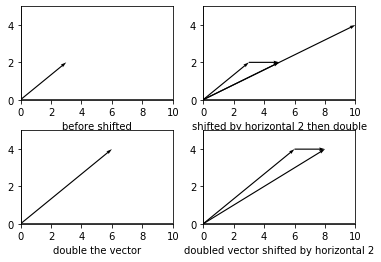

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


fig = plt.figure()

sp1 = plt.subplot(221)
vectors_1 = np.array([[0,0,3,2],]) 
X_1, Y_1, U_1, V_1 = zip(*vectors_1)
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
sp1.quiver(X_1, Y_1, U_1, V_1, angles='xy', scale_units='xy', scale=1)
sp1.set_xlim(0, 10)
sp1.set_ylim(0, 5)
sp1.set_xlabel("before shifted")

sp2 = plt.subplot(222)
vector_2 = np.array([[0,0,3,2],
                     [3,2,2,0],
                     [0,0,5,2],
                     [0,0,10,4]]) 
X_2,Y_2,U_2,V_2 = zip(*vector_2)
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
sp2.quiver(X_2, Y_2, U_2, V_2, angles='xy', scale_units='xy', scale=1)
sp2.set_xlim(0, 10)
sp2.set_ylim(0, 5)
sp2.set_xlabel("shifted by horizontal 2 then double")

sp3 = plt.subplot(223)
vectors_1 = np.array([[0,0,6,4],]) 
X_1, Y_1, U_1, V_1 = zip(*vectors_1)
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
sp3.quiver(X_1, Y_1, U_1, V_1, angles='xy', scale_units='xy', scale=1)
sp3.set_xlim(0, 10)
sp3.set_ylim(0, 5)
sp3.set_xlabel("double the vector")

sp4 = plt.subplot(224)
vector_2 = np.array([[0,0,6,4],
                     [6,4,2,0],
                     [0,0,8,4]]) 
X_2,Y_2,U_2,V_2 = zip(*vector_2)
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
sp4.quiver(X_2, Y_2, U_2, V_2, angles='xy', scale_units='xy', scale=1)
sp4.set_xlim(0, 10)
sp4.set_ylim(0, 5)
sp4.set_xlabel("doubled vector shifted by horizontal 2")

plt.subplots_adjust(hspace=0.33)
plt.draw()

In [3]:
plt.close(fig)

We can also easily check using a special case: $T(0) \stackrel{?}{=} 0$. In the above example, shifting the 0 vector does not give 0 vector. $T(0 v) \neq 0T(v)=0$. 

Non-example2: length of vector, $T(v)=\|v\|, T: \mathbb{R}^{3} \rightarrow \mathbb{R}^{1}$. This is obvious not a linear transformation. If we double a vector, its length also double. But if we double the vector and take minus sign, its length also doubles. Thus  $T(-v) \neq-T(v)$

Example2: Rotation 45 degree,  $T: \mathbb{R}^{2} \rightarrow \mathbb{R}^{2}$. If a vector is doubled, its rotation will also be doubled. The  rotation of sum is the same to the sum of  rotation.  

Therefore, we can say that both projection and rotation are linear transformation.  

Example3: Matrix multiply vector, $T(v)=A v$, this is also linear transformation. Different matrices means different linear transformation. According to the rule of matrix operation: $A(v+w)=Av+Aw, A(c v)=c A v$. For example, if $A=\left[\begin{array}{cc}1 & 0 \\ 0 & -1\end{array}\right]$,  the $x$ part of $v$ stays the same but the $y$ part of $v$ will becomes the opposite. 

**The key idea of linear transformation is using the corresponding matrix.**

For example, if we want a linear transformation that changes a 3 dimensional vector into a 2 dimensional vector, $T: \mathbb{R}^{3} \rightarrow \mathbb{R}^{2}$. Then for $T(v)=A v$ where $v \in \mathbb{R}^{3}, T(v) \in \mathbb{R}^{2}$, $A$ is a $2\times 3$ matrix. 

We can select a basis of input space $v_{1}, v_{2}, \cdots, v_{n}$ and see how $T$ influences each basis part $T\left(v_{1}\right), T\left(v_{2}\right), \cdots, T\left(v_{n}\right)$. Every vector in the input space satisfies:
$$v=c_{1} v_{1}+c_{2} v_{2}+\cdots+c_{n} v_{n}$$

$c_{1}, c_{2}, \cdots, c_{n} $ is the coordinates of $v$ in basis $v_{1}, v_{2}, \cdots, v_{n}$. For example: $
v=\left[\begin{array}{l}
3 \\
2 \\
4
\end{array}\right]=3\left[\begin{array}{l}
1 \\
0 \\
0
\end{array}\right]+2\left[\begin{array}{l}
0 \\
1 \\
0
\end{array}\right]+4\left[\begin{array}{l}
0 \\
0 \\
1
\end{array}\right]
$. The same vector may have different coordinates under different basis.  

Because of the linear transformation, we have:
$$
T(v)=c_{1} T\left(v_{1}\right)+c_{2} T\left(v_{2}\right)+\cdots+c_{n} T\left(v_{n}\right)
$$

We want to find matrix $A$ that describes linear transformation $T: \mathbb{R}^{n} \rightarrow \mathbb{R}^{m}$. We need two basis, one basis can be used to describe input vector, the other for output vector. Suppose $v_{1}, v_{2}, \cdots, v_{n}$ is a basis of input vector in $\mathbb{R}^n$. $w_{1}, w_{2}, \cdots, w_{m}$ is a basis of output vector in $\mathbb{R}^m$.  

See the following example of projection in 2 dimensional matrix 

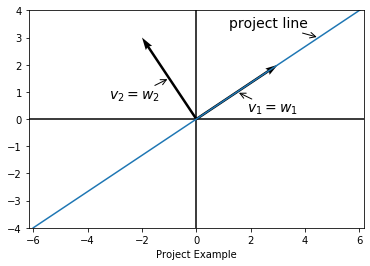

In [3]:
fig = plt.figure()

vectors_1 = np.array([[0, 0, 3, 2],
                      [0, 0, -2, 3]]) 
X_1, Y_1, U_1, V_1 = zip(*vectors_1)
plt.axis('equal')
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
plt.quiver(X_1, Y_1, U_1, V_1, angles='xy', scale_units='xy', scale=1)
plt.plot([-6, 12], [-4, 8])
plt.annotate('$v_1=w_1$', xy=(1.5, 1), xytext=(10, -20), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('$v_2=w_2$', xy=(-1, 1.5), xytext=(-60, -20), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('project line', xy=(4.5, 3), xytext=(-90, 10), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))

ax = plt.gca()
ax.set_xlim(-5, 5)
ax.set_ylim(-4, 4)
ax.set_xlabel("Project Example")

plt.draw()

In [4]:
plt.close(fig)

In the example, $v_1 = w_1, v_2=w_2$. Vectors in the 2 dimensional space are projected onto the project line. If input vector is $v=c_{1} v_{1}+c_{2} v_{2}$, output vector: $T(v)=c_{1} v_{1}$. In other words, the input coordinate is $(c_1, c_2)$, output coordinate becomes $(c_1, 0)$. We can easily find the matrix that $A v=w,$ $\underbrace{\left[\begin{array}{ll}1 & 0 \\ 0 & 0\end{array}\right]}_{A}\left[\begin{array}{l}c_{1} \\ c_{2}\end{array}\right]=\left[\begin{array}{c}c_{1} \\ 0\end{array}\right]$

The basis we choose here is very special, which actually are the eigenvectors of the projection matrix, thus the linear transformation matrix we obtain is a diagonal matrix. If we select the eigenvectors of projection matrix as basis, the linear transformation matrix is a diagonal matrix containing the eigenvalue of projection matrix. 

If we choose standard basis $v_{1}=\left[\begin{array}{l}1 \\ 0\end{array}\right], v_{2}=\left[\begin{array}{l}0 \\ 1\end{array}\right]$, and still $v_1 = w_1, v_2=w_2$. Then the projection matrix we get is $P=\frac{a a^{T}}{a^{T_{a}}}=\left[\begin{array}{cc}\frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & \frac{1}{2}\end{array}\right]$


How to find linear transformation matrix $A$?
* Find a input vector space basis, $v_{1}, v_{2}, \cdots, v_{n}$. Find a output vector space basis, $w_{1}, w_{2}, \cdots, w_{m}$
* Compute $T\left(v_{1}\right)=a_{11} w_{1}+a_{21} w_{2}+\cdots+a_{m 1} w_{m}$, $a_{i1}$ is the first column of $A$
* Similarly, $T\left(v_{2}\right)=a_{12} w_{1}+a_{22} w_{2}+\cdots+a_{m 2} w_{m}$. $a_{i2}$ is the second column of $A$. 
* Continuing the similar procedure until we finally get:$A=\left[\begin{array}{c|c|c|c}a_{11} & a_{12} & \cdots & a_{1 n} \\ a_{21} & a_{22} & \cdots & a_{2 n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m 1} & a_{m 2} & \cdots & a_{m n}\end{array}\right]$

Let's see a linear transformation example: derivative, $T=\frac{\mathrm{d}}{\mathrm{d} x}$. 
* Suppose the input is: $c_{1}+c_{2} x+c_{3} x^{3}$, basis is $1, x, x^{2}$
* Output is: $c_{2}+2 c_{3} x$, basis is $1, x$

Thanks to derivative is linear transformation, we can just know the derivative of some basis function e.g. $\sin x, \cos x$ and then we can compute the derivative of their linear combination. 

Continuting the example, we have $A\left[\begin{array}{l}c_{1} \\ c_{2} \\ c_{2}\end{array}\right]=\left[\begin{array}{c}c_{2} \\ 2 c_{3}\end{array}\right]$. It is a $2 \times 3$ matrix. $A=\left[\begin{array}{lll}0 & 1 & 0 \\ 0 & 0 & 2\end{array}\right]$

The inverse of matrix is actually the inverse of corresponding linear transformation. The matrix multiplication is actually the multiplication of linear transformation. 